# SF crime data analysis and modeling


## Background
This analysis provided insights into the patterns of crime in San Francisco, including high-crime areas, peak times for criminal activity, and prevalent crime types. Based on these findings, we offered actionable recommendations for visitors, residents, and law enforcement in SF to enhance safety and awareness.

## Import packages and load data

In [0]:
from csv import reader
from pyspark.sql import Row 
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sb
import os
os.environ["PYSPARK_PYTHON"] = "python3"


The dataset contained 550M crime-related records from 37 crime category in San Francisco from 2023/01/01 to 2018/05/15.

In [0]:
# 从SF gov download data
import urllib.request
urllib.request.urlretrieve("https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD", "/tmp/myxxxx.csv")
dbutils.fs.mv("file:/tmp/myxxxx.csv", "dbfs:/laioffer/spark_hw1/data/sf_10_07.csv") # save to local
display(dbutils.fs.ls("dbfs:/laioffer/spark_hw1/data/"))


In [0]:
data_path = "dbfs:/laioffer/spark_hw1/data/sf_10_07.csv"
# use this file name later

In [0]:

from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df_opt1 = spark.read.format("csv").option("header", "true").load(data_path)
display(df_opt1)
df_opt1.createOrReplaceTempView("sf_crime")



PdId IncidntNum Incident Code Category Descript DayOfWeek Date Time PdDistrict Resolution Address X Y location SF Find Neighborhoods 2 2 Current Police Districts 2 2 Current Supervisor Districts 2 2 Analysis Neighborhoods 2 2 DELETE - Fire Prevention Districts 2 2 DELETE - Police Districts 2 2 DELETE - Supervisor Districts 2 2 DELETE - Zip Codes 2 2 DELETE - Neighborhoods 2 2 DELETE - 2017 Fix It Zones 2 2 Civic Center Harm Reduction Project Boundary 2 2 Fix It Zones as of 2017-11-06 2 2 DELETE - HSOC Zones 2 2 Fix It Zones as of 2018-02-07 2 2 CBD, BID and GBD Boundaries as of 2017 2 2 Areas of Vulnerability, 2016 2 2 Central Market/Tenderloin Boundary 2 2 Central Market/Tenderloin Boundary Polygon - Updated 2 2 HSOC Zones as of 2018-06-05 2 2 OWED Public Spaces 2 2 Neighborhoods 2 4133422003074 041334220 03074 ROBBERY ROBBERY, BODILY FORCE Monday 11/22/2004 17:50 INGLESIDE NONE GENEVA AV / SANTOS ST -122.420084075249 37.7083109744362 POINT (-122.420084075249 37.7083109744362) null null 9 null null null 8 309 null null null null null null null null null null null null null 5118535807021 051185358 07021 VEHICLE THEFT STOLEN AUTOMOBILE Tuesday 10/18/2005 20:00 PARK NONE TURK ST / STJOSEPHS AV -120.5 90 POINT (-120.50000000000001 90) null null null null null null null null null null null null null null null null null null null null null 4018830907021 040188309 07021 VEHICLE THEFT STOLEN AUTOMOBILE Sunday 02/15/2004 02:00 SOUTHERN NONE BRANNAN ST / 1ST ST -120.5 90 POINT (-120.50000000000001 90) null null null null null null null null null null null null null null null null null null null null null 11014543126030 110145431 26030 ARSON ARSON Friday 02/18/2011 05:27 INGLESIDE NONE 0 Block of SANJUAN AV -122.43622001281 37.7243766140428 POINT (-122.43622001281001 37.7243766140428) 94 9 1 28 9 7 6 28861 25 null null null null null null 1 null null null null 94 10108108004134 101081080 04134 ASSAULT BATTERY Sunday 11/21/2010 17:00 SOUTHERN NONE 400 Block of 10TH ST -122.410541166987 37.7709130566165 POINT (-122.410541166987 37.7709130566165) 32 1 10 34 8 2 9 28853 34 null null null null null null 2 null null null null 32 13027069804134 130270698 04134 ASSAULT BATTERY Tuesday 04/02/2013 15:50 TARAVAL NONE 14TH AV / SANTIAGO ST -122.470365997562 37.74515794927 POINT (-122.470365997562 37.74515794927) 44 10 8 41 1 8 4 29491 40 null null null null null null 1 null null null null 44 17063991304134 170639913 04134 ASSAULT BATTERY Sunday 08/06/2017 18:15 SOUTHERN NONE 800 Block of BRYANT ST -122.40340479147905 37.775420706711 POINT (-122.40340479147905 37.775420706711) 32 1 10 34 14 2 9 28853 34 null null null null null null 2 null null null null 32 16020415607020 160204156 07020 VEHICLE THEFT STOLEN AND RECOVERED VEHICLE Thursday 03/03/2016 19:30 TARAVAL NONE 100 Block of BEPLER ST -122.46354501681947 37.70796836450968 POINT (-122.46354501681947 37.70796836450968) null null null null null null null 28588 null null null null null null null null null null null null null 6068579904134 060685799 04134 ASSAULT BATTERY Saturday 06/17/2006 03:00 TARAVAL NONE 3200 Block of SAN JOSE AV -122.459172646607 37.7082001648459 POINT (-122.459172646607 37.7082001648459) null null null null null null null 28588 null null null null null null null null null null null null null 5134166327195 051341663 27195 TRESPASS TRESPASSING Monday 11/28/2005 16:04 TENDERLOIN ARREST, BOOKED ELLIS ST / 5THSTNORTH ST -120.5 90 POINT (-120.50000000000001 90) null null null null null null null null null null null null null null null null null null null null null 9098843805041 090988438 05041 BURGLARY BURGLARY OF RESIDENCE, FORCIBLE ENTRY Thursday 09/24/2009 13:30 BAYVIEW NONE 1500 Block of SHAFTER AV -122.389849114797 37.7304741509374 POINT (-122.38984911479702 37.7304741509374) 86 2 9 1 10 3 8 58 1 null null null null null null 2 null null null null 86 12620267506244 126202675 06244 LARCENY/THEFT GRAND THEFT FROM LOCKED AUTO Friday 12/21/2012 19:15 CENTRAL NONE PACIFIC AV / GRA

In [0]:
from pyspark.sql import functions as F
from pyspark.sql.functions import date_format, to_date
# Convert 'Date' column to DateType
df_opt1 = df_opt1.withColumn("Date",to_date(df_opt1.Date, "MM/dd/yyyy")) 

# Get the maximum date from the 'Date' column
max_date = df_opt1.agg(F.max('Date')).collect()[0][0]
min_date = df_opt1.agg(F.min('Date')).collect()[0][0]
unique_category_count = df_opt1.select('Category').distinct().count()

In [0]:
print(f"The data set is from {min_date} to {max_date} with {unique_category_count} categories")

The data set is from 2003-01-01 to 2018-05-15 with 37 categories


## Q1 Write a Spark program that counts the number of crimes for different category.

The most common category was "Larceny/Theft" , which indicated that theft were a predominant concern in SF. Categories such as "Treason" and "Pornography/Obscene Material" were extremely rare, suggesting these crimes were either underreported or not as widespread in SF.


In [0]:
q1_result = df_opt1.groupBy("category").count().orderBy("count", ascending=False)
display(q1_result)


category count LARCENY/THEFT 477975 OTHER OFFENSES 301874 NON-CRIMINAL 236928 ASSAULT 167042 VEHICLE THEFT 126228 DRUG/NARCOTIC 117821 VANDALISM 114718 WARRANTS 99821 BURGLARY 91067 SUSPICIOUS OCC 79087 ROBBERY 54467 MISSING PERSON 44268 FRAUD 41348 FORGERY/COUNTERFEITING 22995 SECONDARY CODES 22378 WEAPON LAWS 21004 TRESPASS 19194 PROSTITUTION 16501 STOLEN PROPERTY 11450 DISORDERLY CONDUCT 9932 DRUNKENNESS 9760 SEX OFFENSES, FORCIBLE 8747 RECOVERED VEHICLE 8688 DRIVING UNDER THE INFLUENCE 5652 KIDNAPPING 4282 ARSON 3875 EMBEZZLEMENT 2984 LIQUOR LAWS 2840 LOITERING 2402 SUICIDE 1291 BAD CHECKS 924 BRIBERY 796 EXTORTION 729 GAMBLING 343 PORNOGRAPHY/OBSCENE MAT 57 SEX OFFENSES, NON FORCIBLE 43 TREA 14

In [0]:
# toPandas() -> pandas dataframe, could use pandas api
q1_result_df = q1_result.toPandas()

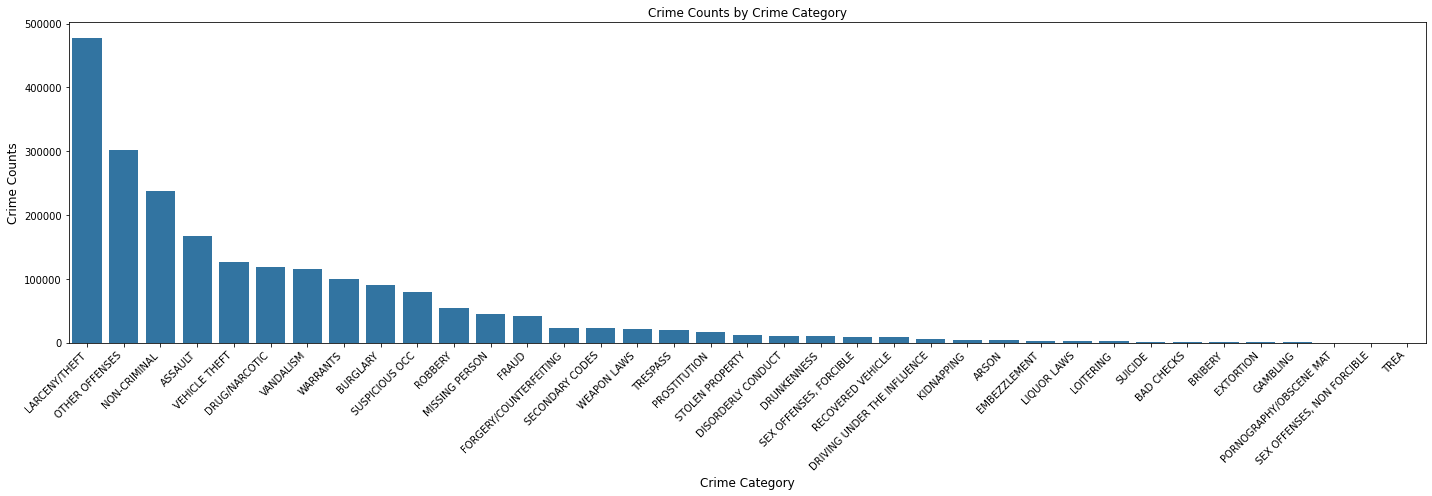

In [0]:
fig, axp = plt.subplots(1, 1, figsize=[20, 7])
sb.barplot(x='category', y='count', data=q1_result_df, ax=axp, color='C0')
axp.set_title('Crime Counts by Crime Category')
axp.set_xlabel('Crime Category', fontsize=12)
axp.set_ylabel('Crime Counts', fontsize=12)
axp.set_xticklabels(axp.get_xticklabels(), rotation=45, horizontalalignment='right') 
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


## Q2 Counts the number of crimes for different district, and visualize your results


Southern SF, Mission and northern SF had relatively higher crime incidents. 

The high crimes in southern SF might because it was a hub for tourism, commerce, transportation. Its high population density, combined with the influx of tourists and commuters, created more opportunities for crimes.

For Mission district and northern districts, historically, faced issues with homeless, drug addiction, and mental health problems. These social issues often correlated with higher rates of crime, including drug-related offenses and petty theft.

In [0]:
q2_result = df_opt1.groupBy("PdDistrict").count().orderBy("count", ascending=False)
display(q2_result)

PdDistrict count SOUTHERN 390692 MISSION 288985 NORTHERN 266435 CENTRAL 221923 BAYVIEW 205480 TENDERLOIN 186954 INGLESIDE 181092 TARAVAL 155461 PARK 119698 RICHMOND 112804 NA 1

In [0]:
q2_result_df = q2_result.toPandas()

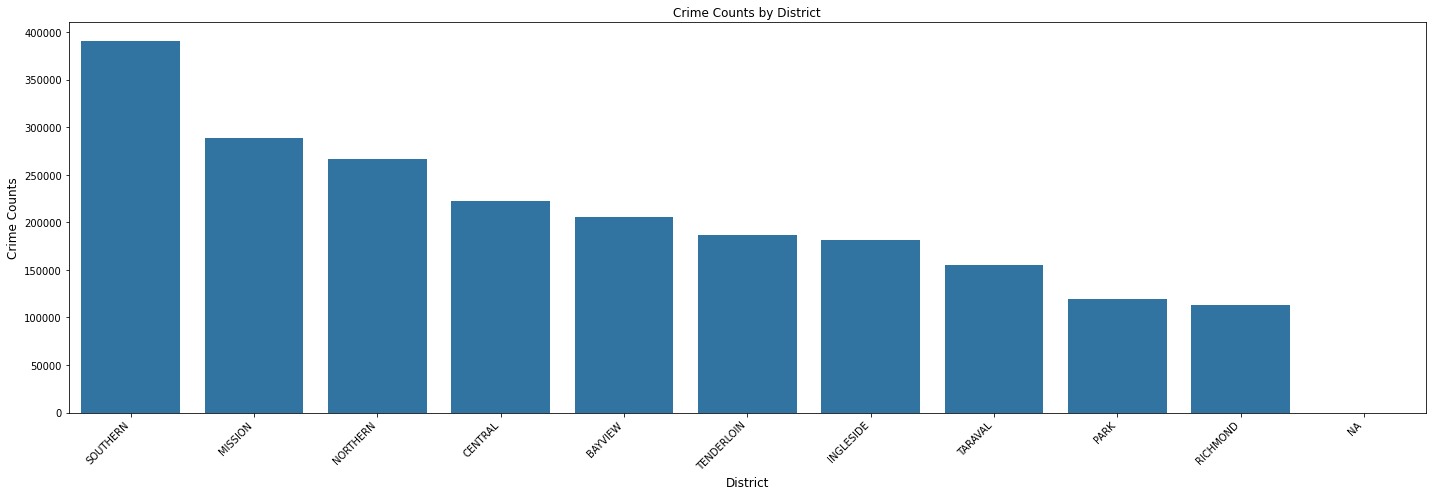

In [0]:
fig, axp = plt.subplots(1, 1, figsize=[20, 7])
sb.barplot(x = 'PdDistrict', y ='count', data=q2_result_df, ax=axp, color='C0')
axp.set_title('Crime Counts by District')
axp.set_xlabel('District', fontsize=12)
axp.set_ylabel('Crime Counts', fontsize=12)
axp.set_xticklabels(axp.get_xticklabels(), rotation=45, horizontalalignment='right') 
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

## Q3 Count the number of crimes each "Sunday" at "SF downtown".   

 

Here, we defined San Francisco downtown based on the spatial boundaries of latitude and longitude. The coordinates for San Francisco are approximately 37.773972 (latitude) and -122.431297 (longitude). So we assumed SF downtown spacial range: X (-122.4213,-122.4313), Y(37.7540,37.7740).

Crime incident in SF on Sunday started to increase since 2012 likely because the increasing poplulation and tourist growth since 2012 especially with an influx of younger, more mobile residents who engaged in more weekend activities. This could naturally lead to more reported crime on Sundays, when public spaces and entertainment areas were crowded.


In [0]:

from pyspark.sql.functions import hour, month, year
from pyspark.sql.functions import to_timestamp

# add date and time info
df_opt1 = df_opt1.withColumn('IncidentTime', to_timestamp(df_opt1['Time'],'HH:mm')) 
df_opt1 = df_opt1.withColumn("Year",year(df_opt1.Date)) 
df_opt1 = df_opt1.withColumn("Month",month(df_opt1.Date)) 
df_opt1 = df_opt1.withColumn('IncidentTime', to_timestamp(df_opt1['Time'],'HH:mm')) 
# extract hour from incident time
df_opt1 = df_opt1.withColumn('Hour',hour(df_opt1['IncidentTime']))

# sf downtown
sf_downtown_sun = (df_opt1.X > -122.4313) & (df_opt1.X < -122.4213) & (df_opt1.Y < 37.7740) & (df_opt1.Y > 37.7540 ) & (df_opt1.DayOfWeek == 'Sunday')
spark_df_q3 = df_opt1.filter(sf_downtown_sun).groupby('Date').count().orderBy('Date')
# convert string to date
display(spark_df_q3)

Date count 2003-01-05 13 2003-01-12 20 2003-01-19 17 2003-01-26 13 2003-02-02 14 2003-02-09 22 2003-02-16 12 2003-02-23 14 2003-03-02 16 2003-03-09 8 2003-03-16 18 2003-03-23 9 2003-03-30 20 2003-04-06 8 2003-04-13 13 2003-04-20 13 2003-04-27 5 2003-05-04 9 2003-05-11 5 2003-05-18 16 2003-05-25 10 2003-06-01 11 2003-06-08 25 2003-06-15 6 2003-06-22 6 2003-06-29 16 2003-07-06 10 2003-07-13 17 2003-07-20 17 2003-07-27 8 2003-08-03 6 2003-08-10 5 2003-08-17 11 2003-08-24 10 2003-08-31 8 2003-09-07 13 2003-09-14 10 2003-09-21 10 2003-09-28 7 2003-10-05 14 2003-10-12 13 2003-10-19 11 2003-10-26 16 2003-11-02 17 2003-11-09 16 2003-11-16 10 2003-11-23 14 2003-11-30 6 2003-12-07 4 2003-12-14 10 2003-12-21 12 2003-12-28 11 2004-01-04 14 2004-01-11 15 2004-01-18 6 2004-01-25 22 2004-02-01 16 2004-02-08 20 2004-02-15 11 2004-02-22 18 2004-02-29 11 2004-03-07 16 2004-03-14 8 2004-03-21 8 2004-03-28 12 2004-04-04 13 2004-04-11 15 2004-04-18 10 2004-04-25 11 2004-05-02 12 2004-05-09 16 2004-05-16 22 2004-05-23 5 2004-05-30 15 2004-06-06 16 2004-06-13 10 2004-06-20 10 2004-06-27 11 2004-07-04 10 2004-07-11 11 2004-07-18 18 2004-07-25 11 2004-08-01 16 2004-08-08 13 2004-08-15 8 2004-08-22 12 2004-08-29 22 2004-09-05 15 2004-09-12 9 2004-09-19 21 2004-09-26 14 2004-10-03 13 2004-10-10 18 2004-10-17 15 2004-10-24 19 2004-10-31 31 2004-11-07 14 2004-11-14 18 2004-11-21 10 2004-11-28 8 2004-12-05 9 2004-12-12 10 2004-12-19 12 2004-12-26 7 2005-01-02 8 2005-01-09 16 2005-01-16 8 2005-01-23 10 2005-01-30 10 2005-02-06 10 2005-02-13 7 2005-02-20 14 2005-02-27 10 2005-03-06 14 2005-03-13 13 2005-03-20 8 2005-03-27 6 2005-04-03 18 2005-04-10 16 2005-04-17 4 2005-04-24 11 2005-05-01 11 2005-05-08 12 2005-05-15 7 2005-05-22 6 2005-05-29 10 2005-06-05 9 2005-06-12 10 2005-06-19 12 2005-06-26 18 2005-07-03 12 2005-07-10 14 2005-07-17 9 2005-07-24 13 2005-07-31 10 2005-08-07 10 2005-08-14 3 2005-08-21 11 2005-08-28 13 2005-09-04 9 2005-09-11 8 2005-09-18 5 2005-09-25 19 2005-10-02 16 2005-10-09 25 2005-10-16 7 2005-10-23 9 2005-10-30 9 2005-11-06 8 2005-11-13 11 2005-11-20 16 2005-11-27 13 2005-12-04 16 2005-12-11 6 2005-12-18 7 2005-12-25 15 2006-01-01 20 2006-01-08 14 2006-01-15 4 2006-01-22 11 2006-01-29 13 2006-02-05 11 2006-02-12 11 2006-02-19 20 2006-02-26 9 2006-03-05 7 2006-03-12 6 2006-03-19 13 2006-03-26 10 2006-04-02 16 2006-04-09 14 2006-04-16 7 2006-04-23 12 2006-04-30 12 2006-05-07 7 2006-05-14 14 2006-05-21 18 2006-05-28 13 2006-06-04 9 2006-06-11 9 2006-06-18 10 2006-06-25 18 2006-07-02 20 2006-07-09 12 2006-07-16 22 2006-07-23 15 2006-07-30 26 2006-08-06 6 2006-08-13 21 2006-08-20 16 2006-08-27 16 2006-09-03 8 2006-09-10 12 2006-09-17 7 2006-09-24 6 2006-10-01 19 2006-10-08 10 2006-10-15 8 2006-10-22 12 2006-10-29 9 2006-11-05 14 2006-11-12 16 2006-11-19 12 2006-11-26 9 2006-12-03 21 2006-12-10 14 2006-12-17 9 2006-12-24 5 2006-12-31 11 2007-01-07 19 2007-01-14 6 2007-01-21 7 2007-01-28 12 2007-02-04 6 2007-02-11 13 2007-02-18 16 2007-02-25 8 2007-03-04 6 2007-03-11 15 2007-03-18 5 2007-03-25 17 2007-04-01 18 2007-04-08 13 2007-04-15 13 2007-04-22 12 2007-04-29 18 2007-05-06 3 2007-05-13 5 2007-05-20 11 2007-05-27 12 2007-06-03 7 2007-06-10 12 2007-06-17 18 2007-06-24 28 2007-07-01 15 2007-07-08 12 2007-07-15 9 2007-07-22 8 2007-07-29 8 2007-08-05 8 2007-08-12 18 2007-08-19 8 2007-08-26 14 2007-09-02 9 2007-09-09 23 2007-09-16 16 2007-09-23 1 2007-09-30 7 2007-10-07 14 2007-10-14 11 2007-10-21 8 2007-10-28 18 2007-11-04 12 2007-11-11 14 2007-11-18 16 2007-11-25 11 2007-12-02 8 2007-12-09 11 2007-12-23 5 2007-12-30 12 2008-01-06 7 2008-01-13 10 2008-01-20 19 2008-01-27 6 2008-02-03 12 2008-02-10 9 2008-02-17 7 2008-02-24 8 2008-03-02 8 2008-03-09 10 2008-03-16 14 2008-03-23 16 2008-03-30 7 2008-04-06 8 2008-04-13 11 2008-04-20 14 2008-04-27 8 2008-05-04 19 2008-05-11 9 2008-05-18 10 2008-05-25 10 2008-06-01 23 2008-06-08 13 2008-06-15 20 2008-06-22 5 2008-06-29 13 2008-07-06 9 2008-07-13 14 2008-07-20 7 2008-07-27 2 2008-08-03 9 2008-08-10 

In [0]:
# convert to pandas for time series analysis
pandas_df_q3 = spark_df_q3.toPandas()
pandas_df_q3['Date'] = pd.to_datetime(pandas_df_q3['Date']) 
pandas_df_q3.set_index('Date', inplace=True)
crime_count = pandas_df_q3['count']

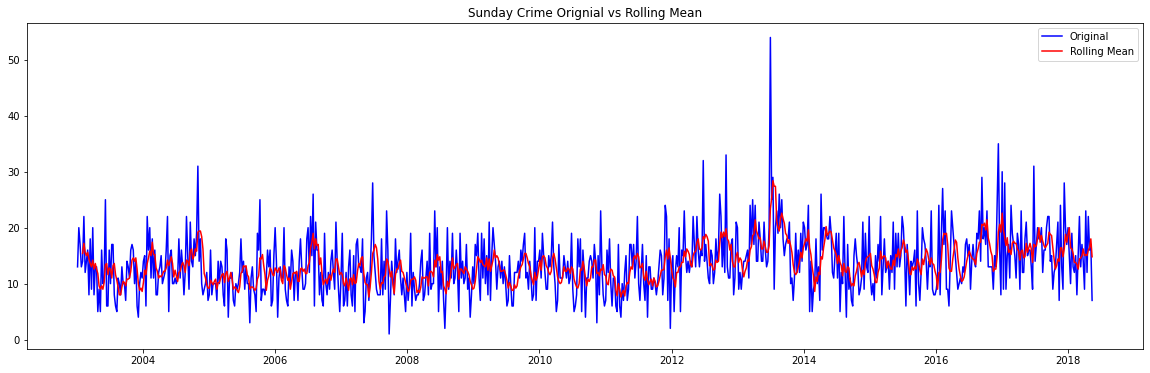

In [0]:
import matplotlib.pyplot as plt

# Calculate rolling mean
rollingmean = crime_count.rolling(window=5).mean()

# Set the figure size
plt.figure(figsize=(20, 6))

# Plot the original data and rolling mean
plt.plot(crime_count, color='blue', label='Original')
plt.plot(rollingmean, color='red', label='Rolling Mean')

# Add legend and title
plt.legend(loc='best')
plt.title('Sunday Crime Orignial vs Rolling Mean')

# Display the plot
plt.show()

The crime incidents were exceptionally high on June 30, 2013, likely due to protests, parades, or celebrations following the U.S. Supreme Court's decision to strike down the Defense of Marriage Act (DOMA) on June 26, 2013, which increase the posibility of conflict,offense, and theft.

In [0]:
max_crime_row = pandas_df_q3['count'].idxmax()

# Extract the date and max crime count
max_crime_row

Out[20]: Timestamp('2013-06-30 00:00:00')

In [0]:
# crimes count near peak crime
peak_filter = (df_opt1.Date >= '2013-06-20') & (df_opt1.Date <= '2013-07-10') & (df_opt1.X > -122.4313) & (df_opt1.X < -122.4213) & (df_opt1.Y < 37.7740) & (df_opt1.Y > 37.7540 )

spark_df_q3_peak = df_opt1.filter(peak_filter)
spark_df_q3_peak_by_loc = spark_df_q3_peak.groupby('Date').count().orderBy('Date')
display(spark_df_q3_peak_by_loc)




Date count 2013-06-20 17 2013-06-21 13 2013-06-22 14 2013-06-23 20 2013-06-24 18 2013-06-25 12 2013-06-26 9 2013-06-27 8 2013-06-28 19 2013-06-29 41 2013-06-30 54 2013-07-01 13 2013-07-02 14 2013-07-03 10 2013-07-04 24 2013-07-05 32 2013-07-06 8 2013-07-07 25 2013-07-08 15 2013-07-09 20 2013-07-10 8

Databricks visualization. Run in Databricks to view.

##Q4 Analysis the number of crime in each month of 2015, 2016, 2017, 2018. Then, give your insights for the output results. What is the business impact for your result?  

The overall trend showed a decline in crime incidents without obvious seasonality, particularly with a sharp drop starting in Feb 2018. The significant decrease in crimes from 2018/02 was likely because the San Francisco Police Department (SFPD) started to put more effort to address local crime trends. For instance, SFFD expanded its foot patrols across the city, especially in areas with high crime rates, like the Mid-Market corridor and Union Plaza. This visible police presence helped deter crimes such as assaults, thefts, and vehicle break-ins. Besides, the SFPD held "Park Smart" public education campaign played a significant role in reducing property crimes, particularly auto burglaries.

In [0]:
spark_df_q4 = df_opt1.filter(df_opt1['Year'].isin('2015', '2016', '2017', '2018')).groupBy('Year', 'Month').count().orderBy('Year', 'Month')
display(spark_df_q4)

Year Month count 2015 1 13181 2015 2 11882 2015 3 13463 2015 4 12526 2015 5 13318 2015 6 12853 2015 7 12949 2015 8 13317 2015 9 12476 2015 10 12697 2015 11 11691 2015 12 11106 2016 1 12532 2016 2 11743 2016 3 11950 2016 4 11905 2016 5 12313 2016 6 11727 2016 7 11832 2016 8 12104 2016 9 12092 2016 10 12913 2016 11 12254 2016 12 12629 2017 1 12687 2017 2 11780 2017 3 13250 2017 4 12452 2017 5 12758 2017 6 12186 2017 7 12717 2017 8 12428 2017 9 12204 2017 10 12970 2017 11 11940 2017 12 12115 2018 1 11667 2018 2 9565 2018 3 10354 2018 4 9954 2018 5 3519

In [0]:
# Create 'YearMonth' column by concatenating 'Year' and 'Month'
spark_df_q4 = spark_df_q4.withColumn('YearMonth', 
                             F.concat(F.col('Year'), 
                                      F.lit('-'), 
                                      F.lpad(F.col('Month'), 2, '0')))

# Display the DataFrame with the new 'YearMonth' column
# Remove 2018-05 because it's a half month
spark_df_q4 = spark_df_q4.filter(spark_df_q4.YearMonth != '2018-05')
display(spark_df_q4)

Databricks visualization. Run in Databricks to view.

Year Month count YearMonth 2015 1 13181 2015-01 2015 2 11882 2015-02 2015 3 13463 2015-03 2015 4 12526 2015-04 2015 5 13318 2015-05 2015 6 12853 2015-06 2015 7 12949 2015-07 2015 8 13317 2015-08 2015 9 12476 2015-09 2015 10 12697 2015-10 2015 11 11691 2015-11 2015 12 11106 2015-12 2016 1 12532 2016-01 2016 2 11743 2016-02 2016 3 11950 2016-03 2016 4 11905 2016-04 2016 5 12313 2016-05 2016 6 11727 2016-06 2016 7 11832 2016-07 2016 8 12104 2016-08 2016 9 12092 2016-09 2016 10 12913 2016-10 2016 11 12254 2016-11 2016 12 12629 2016-12 2017 1 12687 2017-01 2017 2 11780 2017-02 2017 3 13250 2017-03 2017 4 12452 2017-04 2017 5 12758 2017-05 2017 6 12186 2017-06 2017 7 12717 2017-07 2017 8 12428 2017-08 2017 9 12204 2017-09 2017 10 12970 2017-10 2017 11 11940 2017-11 2017 12 12115 2017-12 2018 1 11667 2018-01 2018 2 9565 2018-02 2018 3 10354 2018-03 2018 4 9954 2018-04

## Q5 Analysis the number of crime with respsect to the hour in certian day like 2015/12/15, 2016/12/15, 2017/12/15. Then, give your travel suggestion to visit SF. 

We focused on January 1st (New Year's Day) from 2015 to 2018 for this analysis. The crime rates consistently peaked between 12 AM and 2 AM, likely due to social events, parties, and alcohol consumption associated with New Year celebrations. Additionally, there were higher crime rates at 12 PM and 6 PM, which may coincide with people being out for meals. After 7 PM, crime occurrences decreased, possibly as people returned home to prepare for the workday ahead.


In [0]:
spark_df_q5 = df_opt1.filter(df_opt1['Date'].isin('2015-01-01', '2016-01-01', '2017-01-01','2018-01-01')).groupBy('Year','Hour').count().orderBy("count", ascending=False)
display(spark_df_q5)

Year Hour count 2015 0 107 2016 0 104 2017 0 72 2015 1 49 2016 2 47 2016 12 47 2015 12 41 2018 0 41 2016 1 37 2016 18 37 2017 12 33 2017 2 33 2017 1 33 2015 2 32 2016 16 31 2018 12 30 2018 19 29 2017 15 27 2018 14 26 2018 1 26 2017 13 25 2015 11 25 2016 17 25 2018 17 24 2015 13 24 2018 16 24 2016 10 23 2017 17 23 2018 18 23 2018 2 22 2017 16 21 2018 20 21 2015 9 20 2018 13 20 2017 11 20 2016 15 19 2015 14 19 2017 14 19 2015 3 19 2017 3 18 2018 10 18 2016 22 18 2015 18 18 2016 13 17 2015 15 17 2017 18 17 2016 19 17 2018 22 16 2015 19 16 2016 14 16 2017 10 16 2015 17 16 2015 21 16 2015 8 16 2015 10 15 2018 23 15 2017 6 15 2016 11 14 2018 3 14 2015 22 14 2015 23 14 2018 15 14 2017 20 13 2017 4 13 2015 6 13 2015 20 13 2017 8 12 2017 19 12 2017 22 12 2018 21 12 2018 11 12 2016 21 11 2018 5 11 2015 16 11 2017 23 10 2016 9 10 2017 9 10 2016 4 10 2015 7 10 2016 8 10 2018 4 10 2016 7 9 2018 8 9 2016 20 9 2016 23 9 2016 3 9 2016 5 8 2017 7 7 2017 21 7 2018 9 7 2015 5 7 2015 4 6 2016 6 6 2018 7 6 2018 6 5 2017 5 4

Databricks visualization. Run in Databricks to view.

The crimes were the most intense in the central and eastern parts of SF, including Downtown and Mission District and surrounding areas possibly related to nightlife or residential areas with more activities. The Richmond District also showed notable crime concentration, likely due to their mixed residential and commercial nature. The most common crimes in these areas were theft and assault.


In [0]:
# get the crime type for peak crime hours
spark_df_q5_peak = df_opt1.filter(df_opt1['Date'].isin('2015-01-01', '2016-01-01', '2017-01-01','2018-01-01') & df_opt1['Hour'].isin(0,1,2,12,18) )

In [0]:
spark_df_q5_peak_cat = spark_df_q5_peak.groupBy('category').count().orderBy("count", ascending=False)
display(spark_df_q5_peak_cat)

category count LARCENY/THEFT 188 NON-CRIMINAL 158 OTHER OFFENSES 109 ASSAULT 93 SUSPICIOUS OCC 50 VANDALISM 37 VEHICLE THEFT 25 MISSING PERSON 20 BURGLARY 20 FRAUD 18 ROBBERY 16 SEX OFFENSES, FORCIBLE 16 DRUNKENNESS 15 WARRANTS 14 EMBEZZLEMENT 14 DRUG/NARCOTIC 11 SECONDARY CODES 10 TRESPASS 9 DRIVING UNDER THE INFLUENCE 5 FORGERY/COUNTERFEITING 5 WEAPON LAWS 5 DISORDERLY CONDUCT 3 STOLEN PROPERTY 2 KIDNAPPING 2 ARSON 1 EXTORTION 1 RECOVERED VEHICLE 1 LIQUOR LAWS 1

In [0]:
import folium
from folium.plugins import HeatMap

# Collect necessary data into a Pandas DataFrame (assuming columns 'Latitude' and 'Longitude' exist)
crime_data = spark_df_q5_peak.select("Y", "X").toPandas()

# Create a base map centered around San Francisco
sf_map = folium.Map(location=[37.7749, -122.4194], zoom_start=13)

# add heap layer
heat_data = [[row['Y'], row['X']] for index, row in crime_data.iterrows()]
HeatMap(heat_data).add_to(sf_map)

# Save the map as an HTML file
sf_map.save("sf_crime_map.html")

# If in a Jupyter notebook environment, display the map directly
sf_map

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-3.7.1.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap-glyphicons.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_7cb98d452931a33c743903a3a360072f {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 <script src="https://cdn.jsdelivr.net/gh/python-visualization/folium@main/folium/templates/leaflet_heat.min.js"></script>
</head>
<body>
 
 
 <div class="folium-map" id="map_7cb98d452931a33c743903a3a360072f" ></div>
 
</body>
<script>
 
 
 var map_7cb98d452931a33c743903a3a360072f = L.map(
 "map_7cb98d452931a33c743903a3a360072f",
 {
 center: [37.7749, -122.4194],
 crs: L.CRS.EPSG3857,
 zoom: 13,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_e9e5aff2c59349ad04f82cfed753d6aa = L.tileLayer(
 "https://tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "\u0026copy; \u003ca href=\"https://www.openstreetmap.org/copyright\"\u003eOpenStreetMap\u003c/a\u003e contributors", "detectRetina": false, "maxNativeZoom": 19, "maxZoom": 19, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 );
 
 
 tile_layer_e9e5aff2c59349ad04f82cfed753d6aa.addTo(map_7cb98d452931a33c743903a3a360072f);
 
 
 var heat_map_b4211bb880ec07fddd4a4a3730f471f6 = L.heatLayer(
 [[37.781526271747, -122.40950430935], [37.7923158747647, -122.410845624227], [37.7601858144207, -122.467662674102], [37.775420706711, -122.403404791479], [37.7504443648923, -122.396408273119], [37.77241189340805, -122.50774902862975], [37.7870966495663, -122.41072162587], [37.7899019822508, -122.407114491118], [37.7885335775983, -122.401738283506], [37.7785349354394, -122.41742986085], [37.7088054432465, -122.452664083403], [37.7767584601298, -122.431384548289], [37.7878246694374, -122.397032436528], [37.7821490263522, -122.434165498104], [37.7339497680852, -122.489713969124], [37.8081099573456, -122.40905521632], [37.7451850943238, -122.442155766765], [37.775420706711, -122.403404791479], [37.7981172349798, -122.401027377105], [37.7966976738334, -122.398324392842], [37.7648664738135, -122.449770936688], [37.8051625655624, -122.432957440518], [37.7829514828801, -122.413259498719], [37.7494623837712, -122.478356826784], [37.7820088761349, -122.439086501493], [37.7767239668024, -122.495310429803], [37.78369522697492, -122.4107916776447], [37.7642555194629, -122.442128945417], [37.78369522697492, -122.4107916776447], [37.7740604119579, -122.437612766191], [37.7824014072132, -122.403890955445], [37.7244627349044

In [0]:
# Get crime type for peak areas

sf_downtown_mask = (spark_df_q5_peak['X'] > -122.4313) & (spark_df_q5_peak['X'] < -122.4213) & (spark_df_q5_peak['Y'] < 37.7740) & (spark_df_q5_peak['Y'] > 37.7540)

peak_area_other = spark_df_q5_peak['PdDistrict'].isin(['MISSION', 'CENTRAL', 'RICHMOND'])

# Filter for crimes occurring in either downtown SF or the specified peak districts
spark_df_q5_peak_area = spark_df_q5_peak.filter(sf_downtown_mask | peak_area_other)

# Group by crime category and count occurrences, sorting in descending order of frequency
spark_df_q5_peak_cat = spark_df_q5_peak_area.groupBy('category').count().orderBy("count", ascending=False)

# Display the result
display(spark_df_q5_peak_cat)


category count NON-CRIMINAL 68 LARCENY/THEFT 62 ASSAULT 36 OTHER OFFENSES 33 SUSPICIOUS OCC 17 VANDALISM 11 WARRANTS 7 EMBEZZLEMENT 7 VEHICLE THEFT 7 BURGLARY 7 DRUNKENNESS 6 DRUG/NARCOTIC 6 FRAUD 5 ROBBERY 5 SEX OFFENSES, FORCIBLE 5 MISSING PERSON 5 SECONDARY CODES 3 TRESPASS 3 WEAPON LAWS 2 KIDNAPPING 2 FORGERY/COUNTERFEITING 1 DRIVING UNDER THE INFLUENCE 1 STOLEN PROPERTY 1

### Recommendations
Based on these findings, if visiting SF on New Year's Day, we recommend:
1.  Avoid hanging out in Downtown, Mission, and Richmond for celebrations between 12 AM and 2 AM, as well as during lunch and dinner hours around 12 PM and 6 PM. 
2. If unavoidable, visitors should be cautious of their personal belongings and stay alert for intoxicated individuals, drug activity, and homelessness in these areas.

## Q6 Find out the top-3 danger disrict and their crime category and give advices
(1) Step1: Find out the top-3 danger disrict  
(2) Step2: find out the crime event w.r.t category and time (hour) from the result of step 1  
(3) give your advice to distribute the police based on your analysis results. 


We identified the top three high-risk districts based on the highest number of crime incidents over the past three years, as the most recent data provides more relevant and actionable insights. The top 3 dangerous districts were South SF, Mission and Northern SF.

Within these three districts, the most common crime was larceny/theft. Additionally, all three districts experienced high crime rates around 12 PM and between 17 PM and 18 PM, likely coinciding with lunch breaks, people leaving work, or heading out for dinner. The Mission District also had elevated crime levels around midnight, likely due to its many bars and clubs that drew nightlife crowds.

In [0]:
spark_df_q6 = df_opt1.filter(df_opt1['Year'] >= 2016)
q6_result = spark_df_q6.groupBy("PdDistrict").count().orderBy("count", ascending=False)
display(q6_result)

PdDistrict count SOUTHERN 64097 MISSION 46604 NORTHERN 46550 CENTRAL 42019 BAYVIEW 30706 INGLESIDE 25286 TARAVAL 25008 TENDERLOIN 20983 RICHMOND 20338 PARK 18948 NA 1

In [0]:
spark_df_q6_mission= spark_df_q6.filter(spark_df_q6['PdDistrict']=='MISSION')
spark_df_q6_mission_result = spark_df_q6_mission.groupBy('category','Hour').count()
display(spark_df_q6_mission_result)

category Hour count DRUG/NARCOTIC 23 41 FRAUD 15 31 STOLEN PROPERTY 21 8 VANDALISM 22 159 ROBBERY 14 43 LIQUOR LAWS 11 2 DRUNKENNESS 17 9 SUSPICIOUS OCC 6 45 WEAPON LAWS 10 20 NON-CRIMINAL 15 313 WARRANTS 6 49 NON-CRIMINAL 3 75 TRESPASS 22 18 FRAUD 9 25 WARRANTS 2 72 SEX OFFENSES, FORCIBLE 9 18 MISSING PERSON 3 7 DRUG/NARCOTIC 14 67 RECOVERED VEHICLE 18 11 DRUG/NARCOTIC 2 18 TRESPASS 14 35 SEX OFFENSES, FORCIBLE 4 8 ARSON 19 3 SUICIDE 1 1 VANDALISM 9 117 DRUG/NARCOTIC 8 54 LOITERING 17 2 ARSON 16 2 PROSTITUTION 8 2 ASSAULT 10 164 SECONDARY CODES 4 6 SECONDARY CODES 2 9 FRAUD 23 33 RECOVERED VEHICLE 2 4 SEX OFFENSES, FORCIBLE 11 14 BURGLARY 17 95 SECONDARY CODES 23 26 SEX OFFENSES, FORCIBLE 20 15 SEX OFFENSES, FORCIBLE 5 7 SUSPICIOUS OCC 11 93 NON-CRIMINAL 17 306 SEX OFFENSES, FORCIBLE 14 14 DRUNKENNESS 18 9 DISORDERLY CONDUCT 8 35 RECOVERED VEHICLE 20 3 BRIBERY 6 1 VEHICLE THEFT 19 141 MISSING PERSON 20 44 FRAUD 20 31 DRIVING UNDER THE INFLUENCE 3 8 SUSPICIOUS OCC 10 106 STOLEN PROPERTY 3 7 SECONDARY CODES 10 8 WEAPON LAWS 15 35 DRIVING UNDER THE INFLUENCE 6 1 DRIVING UNDER THE INFLUENCE 22 14 ARSON 15 2 SEX OFFENSES, FORCIBLE 2 13 NON-CRIMINAL 7 123 MISSING PERSON 18 47 WARRANTS 1 68 FORGERY/COUNTERFEITING 19 4 ASSAULT 2 211 OTHER OFFENSES 2 213 TRESPASS 20 31 FORGERY/COUNTERFEITING 18 5 WARRANTS 12 116 WEAPON LAWS 21 34 DRIVING UNDER THE INFLUENCE 14 5 VEHICLE THEFT 7 38 MISSING PERSON 19 40 WEAPON LAWS 8 19 BRIBERY 1 1 STOLEN PROPERTY 17 10 DRIVING UNDER THE INFLUENCE 19 3 RECOVERED VEHICLE 15 4 NON-CRIMINAL 1 165 ROBBERY 5 29 SECONDARY CODES 0 29 MISSING PERSON 6 16 LIQUOR LAWS 12 3 DRIVING UNDER THE INFLUENCE 0 16 ROBBERY 4 41 DRUG/NARCOTIC 4 15 NON-CRIMINAL 16 315 EXTORTION 13 2 VEHICLE THEFT 18 192 DISORDERLY CONDUCT 13 4 DRUG/NARCOTIC 17 81 DRUG/NARCOTIC 22 44 ROBBERY 6 30 STOLEN PROPERTY 15 16 SEX OFFENSES, FORCIBLE 17 14 STOLEN PROPERTY 14 13 FRAUD 4 13 DRUG/NARCOTIC 12 97 BURGLARY 6 48 WARRANTS 19 94 BURGLARY 2 73 SECONDARY CODES 20 32 DRUNKENNESS 13 9 DRUNKENNESS 1 17 MISSING PERSON 15 51 FRAUD 12 67 SEX OFFENSES, FORCIBLE 0 59 DRIVING UNDER THE INFLUENCE 21 12 STOLEN PROPERTY 22 13 ASSAULT 16 249 BURGLARY 21 90 SEX OFFENSES, FORCIBLE 8 66 WARRANTS 21 95 SECONDARY CODES 3 6 KIDNAPPING 13 1 RECOVERED VEHICLE 11 6 ASSAULT 8 134 VEHICLE THEFT 16 103 FRAUD 2 13 DISORDERLY CONDUCT 4 7 WARRANTS 8 89 STOLEN PROPERTY 12 20 FORGERY/COUNTERFEITING 1 2 MISSING PERSON 21 28 ARSON 14 3 ROBBERY 17 75 EMBEZZLEMENT 17 5 DRIVING UNDER THE INFLUENCE 23 18 NON-CRIMINAL 14 265 ARSON 6 4 FRAUD 22 27 SUSPICIOUS OCC 5 33 FORGERY/COUNTERFEITING 2 1 WARRANTS 10 81 BURGLARY 22 110 BRIBERY 2 1 EMBEZZLEMENT 13 3 ARSON 8 3 BURGLARY 4 93 MISSING PERSON 4 9 PROSTITUTION 21 10 ARSON 9 6 NON-CRIMINAL 23 210 MISSING PERSON 0 45 WARRANTS 7 57 TRESPASS 11 39 RECOVERED VEHICLE 13 5 OTHER OFFENSES 22 347 OTHER OFFENSES 7 186 NON-CRIMINAL 22 230 SEX OFFENSES, FORCIBLE 22 19 FRAUD 21 26 STOLEN PROPERTY 10 6 LOITERING 21 4 LARCENY/THEFT 8 295 MISSING PERSON 14 58 BURGLARY 9 50 KIDNAPPING 8 3 LARCENY/THEFT 7 176 DRIVING UNDER THE INFLUENCE 16 5 FORGERY/COUNTERFEITING 13 12 DRUNKENNESS 0 12 LARCENY/THEFT 16 489 TRESPASS 7 66 VEHICLE THEFT 21 147 ARSON 0 8 WEAPON LAWS 2 15 RECOVERED VEHICLE 1 4 FRAUD 3 7 SUICIDE 16 1 OTHER OFFENSES 17 409 LARCENY/THEFT 15 459 SECONDARY CODES 8 14 TRESPASS 21 35 DRUNKENNESS 2 16 ARSON 13 4 ARSON 22 4 SEX OFFENSES, FORCIBLE 3 28 SECONDARY CODES 19 28 WARRANTS 0 119 OTHER OFFENSES 8 245 RECOVERED VEHICLE 10 10 DRIVING UNDER THE INFLUENCE 15 9 VEHICLE THEFT 17 134 FRAUD 10 16 KIDNAPPING 12 3 FORGERY/COUNTERFEITING 4 1 LARCENY/THEFT 18 788 WEAPON LAWS 23 33 LARCENY/THEFT 2 238 DRUG/NARCOTIC 0 41 VEHICLE THEFT 9 60 DRUG/NARCOTIC 1 35 SEX OFFENSES, FORCIBLE 18 7 SECONDARY CODES 11 10 RECOVERED VEHICLE 16 6 MISSING PERSON 13 50 DRIVING UNDER THE INFLUENCE 1 11 FRAUD 19 29 SEX OFFENSES, FORCIBLE 10 15 SUSPICIOUS OCC 18 109 ROBBERY 21 91 DISORDERLY CONDUCT 7 42 DISORDERLY CONDUCT 5 8 WARRANTS 13 122 DISORDERLY CONDUCT 19 4 ARSON 1 9 E

Databricks visualization. Run in Databricks to view.

In [0]:
spark_df_q6_south= spark_df_q6.filter(spark_df_q6['PdDistrict']=='SOUTHERN')
spark_df_q6_south_result = spark_df_q6_south.groupBy('category','Hour').count()
display(spark_df_q6_south_result)

category Hour count ASSAULT 18 259 LARCENY/THEFT 9 695 FRAUD 15 59 STOLEN PROPERTY 21 34 DRUG/NARCOTIC 23 70 DRUNKENNESS 6 3 VANDALISM 22 228 ROBBERY 14 61 DRUNKENNESS 17 6 FORGERY/COUNTERFEITING 23 1 SUSPICIOUS OCC 6 62 WEAPON LAWS 10 22 EXTORTION 18 1 BAD CHECKS 15 4 WARRANTS 6 35 NON-CRIMINAL 15 463 FRAUD 9 41 NON-CRIMINAL 3 98 TRESPASS 22 17 WARRANTS 2 35 MISSING PERSON 3 5 SEX OFFENSES, FORCIBLE 9 10 EMBEZZLEMENT 5 1 DRUG/NARCOTIC 14 98 DRUG/NARCOTIC 2 19 TRESPASS 14 40 EXTORTION 17 2 FORGERY/COUNTERFEITING 6 6 SEX OFFENSES, FORCIBLE 4 8 SUICIDE 1 1 ARSON 19 7 VANDALISM 9 129 DRUG/NARCOTIC 8 71 RECOVERED VEHICLE 3 5 ASSAULT 10 250 SECONDARY CODES 2 18 SECONDARY CODES 4 7 FRAUD 23 39 SEX OFFENSES, FORCIBLE 11 7 RECOVERED VEHICLE 2 4 BURGLARY 17 163 SECONDARY CODES 23 23 SEX OFFENSES, FORCIBLE 5 5 SEX OFFENSES, FORCIBLE 20 14 LOITERING 6 3 SUSPICIOUS OCC 11 136 NON-CRIMINAL 17 515 SEX OFFENSES, FORCIBLE 14 12 DRIVING UNDER THE INFLUENCE 4 2 PROSTITUTION 15 41 DRUNKENNESS 18 12 RECOVERED VEHICLE 20 7 DISORDERLY CONDUCT 8 35 GAMBLING 16 1 EMBEZZLEMENT 18 6 VEHICLE THEFT 19 81 MISSING PERSON 20 49 FRAUD 20 41 DRIVING UNDER THE INFLUENCE 3 4 SUSPICIOUS OCC 10 125 FORGERY/COUNTERFEITING 21 3 WEAPON LAWS 15 36 SECONDARY CODES 10 18 DRIVING UNDER THE INFLUENCE 6 4 STOLEN PROPERTY 3 4 DRIVING UNDER THE INFLUENCE 22 12 NON-CRIMINAL 7 219 WARRANTS 1 46 SEX OFFENSES, FORCIBLE 2 20 MISSING PERSON 18 60 FORGERY/COUNTERFEITING 19 3 OTHER OFFENSES 2 122 TRESPASS 20 30 ASSAULT 2 188 WARRANTS 12 199 FORGERY/COUNTERFEITING 18 10 WEAPON LAWS 21 41 DRIVING UNDER THE INFLUENCE 14 1 WEAPON LAWS 8 16 VEHICLE THEFT 7 37 MISSING PERSON 19 37 RECOVERED VEHICLE 19 13 RECOVERED VEHICLE 15 12 STOLEN PROPERTY 17 24 DRIVING UNDER THE INFLUENCE 19 5 KIDNAPPING 19 2 NON-CRIMINAL 1 210 SECONDARY CODES 0 29 ROBBERY 5 26 MISSING PERSON 6 14 DRIVING UNDER THE INFLUENCE 0 9 DRUG/NARCOTIC 4 13 ROBBERY 4 28 NON-CRIMINAL 16 452 EXTORTION 13 2 VEHICLE THEFT 18 106 DISORDERLY CONDUCT 13 5 DRUG/NARCOTIC 22 97 DRUG/NARCOTIC 17 210 SEX OFFENSES, FORCIBLE 17 25 ROBBERY 6 27 STOLEN PROPERTY 15 21 STOLEN PROPERTY 14 27 FRAUD 4 5 DRUG/NARCOTIC 12 118 BURGLARY 6 78 BURGLARY 2 89 WARRANTS 19 198 DRUNKENNESS 1 14 SECONDARY CODES 20 18 MISSING PERSON 15 87 FRAUD 12 91 DRIVING UNDER THE INFLUENCE 21 9 SEX OFFENSES, FORCIBLE 0 41 STOLEN PROPERTY 22 16 WARRANTS 21 101 ASSAULT 16 274 BURGLARY 21 94 RECOVERED VEHICLE 11 9 KIDNAPPING 13 5 SECONDARY CODES 3 8 SEX OFFENSES, FORCIBLE 8 8 ASSAULT 8 181 DISORDERLY CONDUCT 4 5 VEHICLE THEFT 16 72 FRAUD 2 21 STOLEN PROPERTY 12 28 MISSING PERSON 21 50 FORGERY/COUNTERFEITING 1 1 WARRANTS 8 117 ARSON 14 3 ROBBERY 17 72 EMBEZZLEMENT 17 7 NON-CRIMINAL 14 416 SUSPICIOUS OCC 5 24 FRAUD 22 35 PROSTITUTION 14 34 DRIVING UNDER THE INFLUENCE 23 10 ARSON 6 2 WARRANTS 10 159 EMBEZZLEMENT 13 3 BURGLARY 22 90 ARSON 8 2 BRIBERY 2 1 BURGLARY 4 97 PROSTITUTION 21 15 MISSING PERSON 4 12 LIQUOR LAWS 19 2 NON-CRIMINAL 23 296 MISSING PERSON 0 70 TRESPASS 11 53 WARRANTS 7 110 RECOVERED VEHICLE 13 5 OTHER OFFENSES 22 306 FRAUD 21 39 NON-CRIMINAL 22 303 STOLEN PROPERTY 10 14 OTHER OFFENSES 7 207 LOITERING 0 1 SEX OFFENSES, FORCIBLE 22 17 LARCENY/THEFT 8 523 MISSING PERSON 14 85 BURGLARY 9 68 LARCENY/THEFT 7 294 DRUNKENNESS 0 8 FORGERY/COUNTERFEITING 13 14 DRIVING UNDER THE INFLUENCE 16 3 LARCENY/THEFT 16 1279 VEHICLE THEFT 21 71 TRESPASS 7 91 WEAPON LAWS 2 26 ARSON 0 6 RECOVERED VEHICLE 1 7 FRAUD 3 6 LARCENY/THEFT 15 1178 OTHER OFFENSES 17 460 SECONDARY CODES 8 16 DRUNKENNESS 2 9 TRESPASS 21 27 ARSON 13 5 ARSON 22 4 LIQUOR LAWS 21 3 SEX OFFENSES, FORCIBLE 3 19 SECONDARY CODES 19 21 WARRANTS 0 78 BRIBERY 11 1 OTHER OFFENSES 8 248 RECOVERED VEHICLE 10 16 VEHICLE THEFT 17 85 FRAUD 10 46 ARSON 17 4 DRIVING UNDER THE INFLUENCE 15 5 FORGERY/COUNTERFEITING 4 2 LARCENY/THEFT 18 1861 ARSON 10 4 BAD CHECKS 17 3 WEAPON LAWS 23 33 VEHICLE THEFT 9 68 LARCENY/THEFT 2 358 SEX OFFENSES, FORCIBLE 18 14 SECONDARY CODES 11 30 DRUG/NARCOTIC 0 51 DRUG/NARCOTIC 1 29 RECOVERED VEHICLE 1

Databricks visualization. Run in Databricks to view.

In [0]:
spark_df_q6_north= spark_df_q6.filter(spark_df_q6['PdDistrict']=='NORTHERN')
spark_df_q6_north_result = spark_df_q6_north.groupBy('category','Hour').count()
display(spark_df_q6_north_result)

category Hour count FRAUD 15 52 STOLEN PROPERTY 21 16 DRUG/NARCOTIC 23 44 VANDALISM 22 195 ROBBERY 14 38 LIQUOR LAWS 11 1 DRUNKENNESS 17 1 SUSPICIOUS OCC 6 35 WEAPON LAWS 10 8 TRESPASS 22 14 WARRANTS 6 19 NON-CRIMINAL 15 275 NON-CRIMINAL 3 53 FRAUD 9 40 WARRANTS 2 71 SEX OFFENSES, FORCIBLE 9 3 DRUG/NARCOTIC 14 87 DRUG/NARCOTIC 2 39 RECOVERED VEHICLE 18 5 EXTORTION 17 3 TRESPASS 14 13 ARSON 19 3 SEX OFFENSES, FORCIBLE 4 10 VANDALISM 9 71 DRUG/NARCOTIC 8 73 RECOVERED VEHICLE 3 6 LOITERING 17 2 ASSAULT 10 109 SECONDARY CODES 4 9 SECONDARY CODES 2 3 SEX OFFENSES, FORCIBLE 11 4 RECOVERED VEHICLE 2 7 FRAUD 23 41 BURGLARY 17 121 SECONDARY CODES 23 16 SEX OFFENSES, FORCIBLE 20 17 SEX OFFENSES, FORCIBLE 5 2 SUSPICIOUS OCC 11 62 NON-CRIMINAL 17 272 SEX OFFENSES, FORCIBLE 14 8 DRUNKENNESS 18 6 PROSTITUTION 15 10 DISORDERLY CONDUCT 8 21 BRIBERY 8 1 EMBEZZLEMENT 18 1 VEHICLE THEFT 19 136 MISSING PERSON 20 31 FRAUD 20 32 DRIVING UNDER THE INFLUENCE 3 7 SUSPICIOUS OCC 10 64 STOLEN PROPERTY 3 16 WEAPON LAWS 15 12 FORGERY/COUNTERFEITING 21 7 SECONDARY CODES 10 17 WARRANTS 1 49 NON-CRIMINAL 7 124 MISSING PERSON 18 29 SEX OFFENSES, FORCIBLE 2 8 FORGERY/COUNTERFEITING 19 4 OTHER OFFENSES 2 174 ASSAULT 2 132 TRESPASS 20 18 FORGERY/COUNTERFEITING 18 19 WARRANTS 12 61 LIQUOR LAWS 3 1 WEAPON LAWS 21 14 VEHICLE THEFT 7 20 MISSING PERSON 19 27 RECOVERED VEHICLE 19 8 WEAPON LAWS 8 6 EXTORTION 16 2 STOLEN PROPERTY 17 24 NON-CRIMINAL 1 113 SECONDARY CODES 0 23 MISSING PERSON 6 12 ROBBERY 5 20 LIQUOR LAWS 12 1 DRIVING UNDER THE INFLUENCE 0 12 DRUG/NARCOTIC 4 18 ROBBERY 4 23 NON-CRIMINAL 16 279 DRIVING UNDER THE INFLUENCE 5 1 VEHICLE THEFT 18 139 DRUG/NARCOTIC 22 74 DRUG/NARCOTIC 17 69 STOLEN PROPERTY 15 20 ROBBERY 6 20 SEX OFFENSES, FORCIBLE 17 5 STOLEN PROPERTY 14 17 FRAUD 4 12 BURGLARY 6 60 DRUG/NARCOTIC 12 75 BURGLARY 2 95 SECONDARY CODES 20 20 WARRANTS 19 67 DRUNKENNESS 1 12 FRAUD 12 91 SEX OFFENSES, FORCIBLE 0 30 MISSING PERSON 15 38 STOLEN PROPERTY 22 11 ASSAULT 16 178 BURGLARY 21 90 WARRANTS 21 51 SECONDARY CODES 3 8 SEX OFFENSES, FORCIBLE 8 10 KIDNAPPING 13 5 RECOVERED VEHICLE 11 6 ASSAULT 8 103 VEHICLE THEFT 16 86 FRAUD 2 21 DISORDERLY CONDUCT 4 2 WARRANTS 8 57 STOLEN PROPERTY 12 20 MISSING PERSON 21 29 FORGERY/COUNTERFEITING 1 1 ROBBERY 17 40 NON-CRIMINAL 14 260 FRAUD 22 31 ARSON 6 4 PROSTITUTION 14 13 FORGERY/COUNTERFEITING 2 2 DRIVING UNDER THE INFLUENCE 23 5 EMBEZZLEMENT 13 1 WARRANTS 10 60 BURGLARY 22 81 BURGLARY 4 84 MISSING PERSON 4 4 ARSON 9 2 PROSTITUTION 21 8 MISSING PERSON 0 30 NON-CRIMINAL 23 192 WARRANTS 7 43 TRESPASS 11 16 RECOVERED VEHICLE 13 6 NON-CRIMINAL 22 203 OTHER OFFENSES 22 219 SEX OFFENSES, FORCIBLE 22 15 FRAUD 21 38 OTHER OFFENSES 7 97 STOLEN PROPERTY 10 8 LARCENY/THEFT 8 471 MISSING PERSON 14 28 BURGLARY 9 65 LARCENY/THEFT 7 263 DRUNKENNESS 0 7 FORGERY/COUNTERFEITING 13 6 DRIVING UNDER THE INFLUENCE 16 4 WEAPON LAWS 2 25 LARCENY/THEFT 16 1000 VEHICLE THEFT 21 113 RECOVERED VEHICLE 1 5 TRESPASS 7 48 FRAUD 3 17 LARCENY/THEFT 15 896 OTHER OFFENSES 17 249 SECONDARY CODES 8 11 DRUNKENNESS 2 10 ARSON 22 3 TRESPASS 21 12 ARSON 13 1 SEX OFFENSES, FORCIBLE 3 7 SECONDARY CODES 19 15 BRIBERY 16 1 WARRANTS 0 58 OTHER OFFENSES 8 205 RECOVERED VEHICLE 10 3 VEHICLE THEFT 17 137 FRAUD 10 47 DRIVING UNDER THE INFLUENCE 15 5 KIDNAPPING 12 1 FORGERY/COUNTERFEITING 4 2 LARCENY/THEFT 18 1586 WEAPON LAWS 23 17 VEHICLE THEFT 9 59 LARCENY/THEFT 2 275 SECONDARY CODES 11 13 DRUG/NARCOTIC 0 61 RECOVERED VEHICLE 16 11 DRUG/NARCOTIC 1 34 DRUNKENNESS 3 6 SEX OFFENSES, FORCIBLE 18 7 MISSING PERSON 13 41 FRAUD 19 30 SEX OFFENSES, FORCIBLE 10 7 DRIVING UNDER THE INFLUENCE 1 4 SUSPICIOUS OCC 18 78 ROBBERY 21 60 DISORDERLY CONDUCT 7 34 DISORDERLY CONDUCT 5 2 ARSON 1 7 WARRANTS 13 83 DISORDERLY CONDUCT 19 4 RECOVERED VEHICLE 4 9 ROBBERY 8 19 EXTORTION 12 1 OTHER OFFENSES 4 105 ROBBERY 2 43 DRUG/NARCOTIC 7 44 SUSPICIOUS OCC 13 73 RECOVERED VEHICLE 9 9 LARCENY/THEFT 10 787 BURGLARY 8 83 TRESPASS 23 10 WEAPON LAWS 11 15 ROBBERY 22 48 STOLEN PROPERTY 9 11 BURGL

Databricks visualization. Run in Databricks to view.

### Recommendations
Bases on these insights, we recommend:
1. Increase police presence during peak hours (12 PM, 5-6 PM) in all districts, focusing on high-traffic areas near offices, restaurants, and public transit.
2. Boost night patrols in the Mission District around midnight, particularly in areas with bars and clubs to manage the nightlife-related crime spike.
3. Implement targeted anti-theft operations by deploying undercover officers during peak times and raising public awareness in theft hotspots.

## Q7 For different category of crime, find the percentage of resolution. Based on the output, give your hints to adjust the policy.

Similarly as Q6, here we only considered data since 2016 due to the consideration of data representative. 

Most of the resolutions were None meaning it was either unresolved or the resolution were missing especially for mirror offense like Larceny/Theft. For not None rosulation, the most common one was arrested, booked. The serious crimes, like Arson, Kidnapping, and Drug/Narcotic offenses, showed more resolution activity . This might indicated a higher prioritization or clearer pathways for resolution in these categories.

In [0]:
q7_result = spark_df_q6.groupBy("category","Resolution").count().orderBy("count", ascending=False)
display(q7_result)

category Resolution count LARCENY/THEFT NONE 97641 NON-CRIMINAL NONE 36260 OTHER OFFENSES ARREST, BOOKED 26073 VANDALISM NONE 18710 ASSAULT NONE 17097 OTHER OFFENSES NONE 16108 SUSPICIOUS OCC NONE 12364 VEHICLE THEFT NONE 12343 WARRANTS ARREST, BOOKED 11627 BURGLARY NONE 11371 ASSAULT ARREST, BOOKED 9832 DRUG/NARCOTIC ARREST, BOOKED 8070 MISSING PERSON NONE 7300 ROBBERY NONE 6092 FRAUD NONE 4987 LARCENY/THEFT ARREST, BOOKED 3973 NON-CRIMINAL ARREST, BOOKED 2971 WEAPON LAWS ARREST, BOOKED 2677 VANDALISM ARREST, BOOKED 2327 BURGLARY ARREST, BOOKED 2326 TRESPASS ARREST, BOOKED 2205 SECONDARY CODES NONE 2157 STOLEN PROPERTY ARREST, BOOKED 1704 TRESPASS NONE 1694 SEX OFFENSES, FORCIBLE NONE 1564 ROBBERY ARREST, BOOKED 1437 RECOVERED VEHICLE NONE 1337 WEAPON LAWS NONE 1153 SECONDARY CODES ARREST, BOOKED 1083 PROSTITUTION ARREST, BOOKED 973 NON-CRIMINAL UNFOUNDED 959 FRAUD ARREST, BOOKED 954 FORGERY/COUNTERFEITING NONE 860 DRUG/NARCOTIC NONE 833 VEHICLE THEFT ARREST, BOOKED 819 WARRANTS NONE 779 SUSPICIOUS OCC ARREST, BOOKED 747 DRIVING UNDER THE INFLUENCE ARREST, BOOKED 728 DRUNKENNESS ARREST, BOOKED 654 DISORDERLY CONDUCT NONE 634 ARSON NONE 518 DISORDERLY CONDUCT ARREST, BOOKED 495 VEHICLE THEFT UNFOUNDED 420 FORGERY/COUNTERFEITING ARREST, BOOKED 349 SUSPICIOUS OCC UNFOUNDED 335 SEX OFFENSES, FORCIBLE ARREST, BOOKED 310 EMBEZZLEMENT NONE 310 OTHER OFFENSES UNFOUNDED 309 MISSING PERSON UNFOUNDED 294 MISSING PERSON ARREST, BOOKED 235 DRUNKENNESS NONE 227 KIDNAPPING NONE 213 NON-CRIMINAL EXCEPTIONAL CLEARANCE 204 STOLEN PROPERTY NONE 194 ARSON ARREST, BOOKED 185 PROSTITUTION NONE 176 KIDNAPPING ARREST, BOOKED 166 SUICIDE NONE 163 LIQUOR LAWS ARREST, BOOKED 158 OTHER OFFENSES ARREST, CITED 149 EXTORTION NONE 124 FORGERY/COUNTERFEITING UNFOUNDED 118 RECOVERED VEHICLE ARREST, BOOKED 109 BRIBERY NONE 85 EMBEZZLEMENT ARREST, BOOKED 82 MISSING PERSON EXCEPTIONAL CLEARANCE 78 BRIBERY ARREST, BOOKED 62 BAD CHECKS NONE 61 LARCENY/THEFT UNFOUNDED 54 SUSPICIOUS OCC EXCEPTIONAL CLEARANCE 51 PROSTITUTION EXCEPTIONAL CLEARANCE 50 ASSAULT EXCEPTIONAL CLEARANCE 50 LOITERING ARREST, BOOKED 50 FRAUD UNFOUNDED 48 OTHER OFFENSES EXCEPTIONAL CLEARANCE 47 ASSAULT UNFOUNDED 41 LOITERING NONE 39 DRIVING UNDER THE INFLUENCE NONE 37 GAMBLING ARREST, BOOKED 27 MISSING PERSON LOCATED 26 NON-CRIMINAL PSYCHOPATHIC CASE 25 SEX OFFENSES, FORCIBLE UNFOUNDED 23 WARRANTS UNFOUNDED 22 DRUG/NARCOTIC ARREST, CITED 20 SECONDARY CODES UNFOUNDED 19 GAMBLING NONE 16 VANDALISM UNFOUNDED 15 ASSAULT ARREST, CITED 15 LIQUOR LAWS NONE 15 LARCENY/THEFT EXCEPTIONAL CLEARANCE 15 TRESPASS UNFOUNDED 14 DISORDERLY CONDUCT UNFOUNDED 12 BURGLARY UNFOUNDED 12 PORNOGRAPHY/OBSCENE MAT NONE 11 NON-CRIMINAL NOT PROSECUTED 11 WEAPON LAWS UNFOUNDED 10 SEX OFFENSES, FORCIBLE EXCEPTIONAL CLEARANCE 10 TRESPASS ARREST, CITED 9 VEHICLE THEFT EXCEPTIONAL CLEARANCE 9 ROBBERY EXCEPTIONAL CLEARANCE 9 SECONDARY CODES EXCEPTIONAL CLEARANCE 8 PROSTITUTION UNFOUNDED 7 ROBBERY UNFOUNDED 7 MISSING PERSON NOT PROSECUTED 7 VANDALISM EXCEPTIONAL CLEARANCE 6 BURGLARY EXCEPTIONAL CLEARANCE 6 DRUG/NARCOTIC NOT PROSECUTED 6 EXTORTION ARREST, BOOKED 6 EMBEZZLEMENT UNFOUNDED 5 LARCENY/THEFT NOT PROSECUTED 5 DRUNKENNESS UNFOUNDED 5 ASSAULT NOT PROSECUTED 4 DRUG/NARCOTIC EXCEPTIONAL CLEARANCE 4 SUICIDE UNFOUNDED 4 OTHER OFFENSES NOT PROSECUTED 4 BAD CHECKS ARREST, BOOKED 4 SUICIDE ARREST, BOOKED 4 TRESPASS EXCEPTIONAL CLEARANCE 4 NON-CRIMINAL ARREST, CITED 4 EXTORTION UNFOUNDED 4 DRUG/NARCOTIC UNFOUNDED 3 WARRANTS PROSECUTED FOR LESSER OFFENSE 3 MISSING PERSON PSYCHOPATHIC CASE 3 KIDNAPPING EXCEPTIONAL CLEARANCE 3 SEX OFFENSES, NON FORCIBLE NONE 3 NON-CRIMINAL LOCATED 3 TREA NONE 3 VANDALISM ARREST, CITED 3 ASSAULT PSYCHOPATHIC CASE 2 FRAUD EXCEPTIONAL CLEARANCE 2 SUSPICIOUS OCC PSYCHOPATHIC CASE 2 WARRANTS EXCEPTIONAL CLEARANCE 2 DRIVING UNDER THE INFLUENCE EXCEPTIONAL CLEARANCE 2 DISORDERLY CONDUCT EXCEPTIONAL CLEARANCE 2 DISORDERLY CONDUCT ARREST, CITED 2 SUSPICIOUS OCC NOT PROSECUTED 2 ASSAULT COMPLAINANT REFUSES TO

Databricks visualization. Run in Databricks to view.

### Recommendation
The SF police could designate a dedicated team to focus on minor offenses with the highest social impact. By assigning fixed personnel to consistently handle the same types of cases, the resolution process would become more streamlined, leading to a higher resolution rate.

## Q8 Analysis the new columns of the data and find how to use the new columns (e.g., like 'Fire Prevention Districts' etc)

Larceny/Theft was the most common crime with a low resolution rate. We aim edto explore the 'Descript' column to identify the most frequently stolen items and raise public awareness to encourage better precautions.

In [0]:
from pyspark.sql.functions import col, lower

spark_df_q8 = spark_df_q6.filter(spark_df_q6['category']=='LARCENY/THEFT')
spark_df_q8_lower = spark_df_q8.withColumn("Descript", lower(col("Descript")))
pandas_df_q8 = spark_df_q8_lower.select("Descript").toPandas()



In [0]:
import nltk
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
from collections import Counter

# Download NLTK stopwords if not already available
nltk.download('stopwords')
stop_words = set(stopwords.words('english')).union({"theft", "larceny", "stolen", "property", "taken"})

# Preprocess function (assumes text is in pandas_df_q8["Descript"])
def preprocess(text):
    text = text.lower()
    words = [word for word in simple_preprocess(text) if word not in stop_words]
    return words

# Apply preprocessing
processed_docs = pandas_df_q8["Descript"].apply(preprocess).tolist()



# Flatten the list of lists and count word frequencies
all_words = [word for doc in processed_docs for word in doc]
word_counts = Counter(all_words)

# Print the most common words
print("Word Counts:", word_counts.most_common(20))




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Word Counts: [('grand', 67726), ('auto', 63440), ('locked', 57138), ('petty', 31895), ('unlocked', 6872), ('building', 6823), ('shoplifting', 5067), ('person', 3190), ('bicycle', 1881), ('pickpocket', 1842), ('attempted', 1083), ('lost', 786), ('vehicle', 746), ('computers', 343), ('cell', 343), ('phones', 343), ('merchant', 197), ('library', 197), ('strip', 183), ('checks', 167)]


The most common types of theft in SF were auto theft, shoplifting, and bicycle theft.

### Recommendation
1. When parking in SF, we recommend choosing parking lots or areas with surveillance, especially in high-risk neighborhoods like Downtown, Mission, and Richmond.
2. Retailers should establish partnerships with law enforcement to improve theft prevention, increase security patrols, and track repeat offenders.
3. To enhance bike security, we recommend using high-quality locks, registering bikes, and collaborating with bike shops to promote anti-theft practices.

## Conclusion

In this project, we conducted a comprehensive analysis of 550M crime-related records from 37 crime categories in San Francisco from 2023/01/01 to 2018/05/15 to identify patterns, high-risk areas, and prevalent types of crime and their resolution, aiming to support law enforcement and community safety initiatives. 

Using Spark, we processed large datasets, applied OLAP techniques for in-depth analysis, and visualized results such crimes across district, category and time, crime trend, crime heap map. Based on these, we could identify significant crime trends including peak hours and high-crime areas, enabling data-driven recommendations for public safety and crime prevention. 

According to the exploration, we found:

1. SF became safer since February 2018, likely due to increased efforts by the San Francisco Police Department (SFPD) to address local crime trends.
2. The most dangerous districts were South SF, Mission, and Northern SF, which had higher crime rates especially theft/larceny due to their active nightlife, commercial centers, and mixed residential areas. Peak crime hours were around lunchtime, dinnertime, and midnight.
3. SFPD prioritized more serious crimes, resulting in higher resolution rates for these offenses, while minor offenses tended to have lower resolution rates.
4. For theft, the most frequent crime in, the most common types were auto theft, shoplifting, and bicycle theft.


## Recommendations:

To reduce crime occurrences, we recommend the following actions:

1. For Residents and Visitors, they should avoid high-crime areas in South SF, Mission, and Northern SF during peak hours (lunchtime, dinnertime, and midnight). If unavoidable, remain vigilant about personal belongings and be cautious of intoxicated individuals, drug activity, and homelessness in these areas.

2. For SF Police should i3ncrease police presence during peak hours in South SF, Mission, and Northern SF, especially in high-traffic areas near offices, restaurants, and bars. Besides, they could deploy undercover officers in theft hotspots during peak times and run public awareness campaigns to reduce theft.

To address low resolution rates for minor offenses, we recommend:

1. SF police could assign a specialized team to focus on minor offenses with significant social impact to improve resolution rates.

To protect people's property safety, we recommend:

1. When parking in SF, use parking lots or areas with surveillance, especially in high-risk neighborhoods like Downtown, Mission, and Richmond.

2. Retailers should partner with law enforcement to enhance theft prevention, increase security patrols, and monitor repeat offenders.

3. Bike owners should use high-quality locks, register bikes, and collaborate with bike shops to promote anti-theft practices.